<a href="https://colab.research.google.com/github/Shereen74/graduation_project/blob/main/Last_Copy_of_PredictingEnergyConsumption_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/GP

/content/drive/MyDrive/GP


In [2]:
!pwd

/content/drive/MyDrive/GP


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
weather_data = pd.read_csv('./ashrae-energy-prediction/weather_train.csv')
building_data = pd.read_csv('./ashrae-energy-prediction/building_metadata.csv')

In [ ]:
counter = 0
batch_size = 1000000
train_data = []
for chunk in pd.read_csv('./ashrae-energy-prediction/train.csv', chunksize=batch_size):

    train_data.append(chunk)
    counter += 1

train_data

In [6]:
Train_Data = pd.concat(train_data)
Train_Data.shape

(20216100, 4)

In [7]:
Train_Data.tail()

,building_id,meter,timestamp,meter_reading
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575
20216099,1448,0,2016-12-31 23:00:00,2.850


In [8]:
weather_data.tail()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


## EDA

In [9]:
# def each_building_consumption() : 
#     'This function building energy consumption of all meters '
#     p21=train.groupby(["building_id"])["meter_reading"].sum()
#     k = 'consumption of each building '
#     p21.astype('float')
#     plt.figure(figsize=(16,8))
#     plt.title(k)
#     plt.xlabel('building id')
#     #plt.xticks(rotation='vertical')
#     plt.ylabel('meter_reading')
#     #plt.xlim(700,1440)
#     plt.plot(p21)
#     return p21

In [10]:
#Displaying distribution of the meter reading in meters without zeros
#Used log transformation to avoid the skewness of the meter reading
# plt.figure(figsize=(10, 10))

# #Different meter types [0, 1, 2, 3]
# meterTypes = sorted(train['meter'].unique().tolist())

# #Plotting 'meter_reading' distribution for each meter
# for meter_type in meterTypes:
#     subset = train[train['meter'] == meter_type]
#     sns.kdeplot(np.log1p(subset["meter_reading"]), #estimates the density of a variable
#                 label = meter_type, linewidth = 2)  #and creates a smooth curve that represents the probability density of the data.

# #Setting figure information (label, title, legend)
# plt.ylabel("Density")
# plt.xlabel("Meter_reading")
# plt.title("Distribution graph for 'Meter Reading' ", size=13)
# plt.legend(['Electricity', 'Chilled water', 'Steam', 'Hot water'])

In [11]:
# k = each_building_consumption()

## Data Preprocessing

In [12]:
#Merging train data
train = Train_Data.merge(building_data, on='building_id', how='left')
train = train.merge(weather_data, on=['site_id', 'timestamp'], how='left')
train.tail(25)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
20216075,1431,0,2016-12-31 23:00:00,87.9500,15,Public services,111360,2000.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216076,1431,2,2016-12-31 23:00:00,426.3400,15,Public services,111360,2000.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216077,1432,0,2016-12-31 23:00:00,403.4500,15,Education,160673,1968.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216078,1433,0,2016-12-31 23:00:00,41.3500,15,Education,28084,1913.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216079,1433,2,2016-12-31 23:00:00,3173.8800,15,Education,28084,1913.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216080,1434,0,2016-12-31 23:00:00,70.7250,15,Education,33148,1967.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216081,1434,2,2016-12-31 23:00:00,259.0730,15,Education,33148,1967.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216082,1435,0,2016-12-31 23:00:00,4.7250,15,Education,9552,1961.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216083,1436,0,2016-12-31 23:00:00,11.6000,15,Manufacturing/industrial,11302,1937.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216084,1436,2,2016-12-31 23:00:00,1274.6600,15,Manufacturing/industrial,11302,1937.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [13]:
#Data correction for site 0, electric meter type which is 0
mask = (train['site_id'] == 0) & (train['meter'] == 0)

# Update the values in the "meter_reading" column for the selected rows
train.loc[mask, 'meter_reading'] *= 0.2931

In [14]:
train.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8.088455e+06,3.506933e+06,2.011944e+07,1.139074e+07,2.011596e+07,1.646708e+07,1.898443e+07,1.876705e+07,2.007242e+07
mean,7.992780e+02,6.624412e-01,2.109925e+03,7.992232e+00,1.077830e+05,1.968277e+03,4.184848e+00,1.598795e+01,1.900423e+00,7.747429e+00,7.964155e-01,1.016085e+03,1.730151e+02,3.377525e+00
std,4.269133e+02,9.309921e-01,1.532357e+05,5.099060e+00,1.171424e+05,3.020815e+01,4.008277e+00,1.094729e+01,2.402909e+00,1.017867e+01,7.468997e+00,7.060539e+00,1.140574e+02,2.265694e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.797590e+01,3.000000e+00,3.252700e+04,1.951000e+03,1.000000e+00,8.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011600e+03,7.000000e+01,2.100000e+00
50%,8.950000e+02,0.000000e+00,7.509000e+01,9.000000e+00,7.270900e+04,1.969000e+03,3.000000e+00,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00
75%,1.179000e+03,1.000000e+00,2.526000e+02,1.300000e+01,1.391130e+05,1.993000e+03,6.000000e+00,2.410000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020500e+03,2.800000e+02,4.600000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


In [15]:
100 * (train.isnull().sum() / len(train))

building_id            0.000000
meter                  0.000000
timestamp              0.000000
meter_reading          0.000000
site_id                0.000000
primary_use            0.000000
square_feet            0.000000
year_built            59.990033
floor_count           82.652772
air_temperature        0.478124
cloud_coverage        43.655131
dew_temperature        0.495348
precip_depth_1_hr     18.544739
sea_level_pressure     6.092515
wind_direction         7.167792
wind_speed             0.710701
dtype: float64

In [16]:
#Dropping unused columns (decreasing null values)
train = train.drop(columns=['year_built', 'floor_count', 'wind_direction'])

In [17]:
#https://www.kaggle.com/c/ashrae-energy-prediction/discussion/115256
import holidays

en_holidays = holidays.UnitedKingdom(prov='ENG')#holidays list of  England
ir_holidays = holidays.Ireland()# holidays list of Ireland
ca_holidays = holidays.Canada()#holidays list of Canada
us_holidays = holidays.UnitedStates()# holidays list of US

en_idx = train.query('site_id == 1 or site_id == 5').index
ir_idx = train.query('site_id == 12').index
ca_idx = train.query('site_id == 7 or site_id == 11').index
us_idx = train.query('site_id == 0 or site_id == 2 or site_id == 3 or site_id == 4 or site_id == 6 or site_id == 8 or site_id == 9 or site_id == 10 or site_id == 13 or site_id == 14 or site_id == 15').index

train['IsHoliday'] = 0
train.loc[en_idx, 'IsHoliday'] = train.loc[en_idx, 'timestamp'].apply(lambda x: en_holidays.get(x, default=0))
train.loc[ir_idx, 'IsHoliday'] = train.loc[ir_idx, 'timestamp'].apply(lambda x: ir_holidays.get(x, default=0))
train.loc[ca_idx, 'IsHoliday'] = train.loc[ca_idx, 'timestamp'].apply(lambda x: ca_holidays.get(x, default=0))
train.loc[us_idx, 'IsHoliday'] = train.loc[us_idx, 'timestamp'].apply(lambda x: us_holidays.get(x, default=0))

holiday_idx = train['IsHoliday'] != 0
train.loc[holiday_idx, 'IsHoliday'] = 1
train['IsHoliday'] = train['IsHoliday'].astype(np.uint8)

In [18]:
del en_idx,ir_idx,ca_idx,us_idx,holiday_idx

In [19]:
train

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,IsHoliday
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432,25.0,6.0,20.0,NaN,1019.7,0.0,1
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720,25.0,6.0,20.0,NaN,1019.7,0.0,1
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376,25.0,6.0,20.0,NaN,1019.7,0.0,1
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685,25.0,6.0,20.0,NaN,1019.7,0.0,1
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607,25.0,6.0,20.0,NaN,1019.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1.7,NaN,-5.6,-1.0,1008.5,8.8,0
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,1.7,NaN,-5.6,-1.0,1008.5,8.8,0
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1.7,NaN,-5.6,-1.0,1008.5,8.8,0
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,1.7,NaN,-5.6,-1.0,1008.5,8.8,0


In [4]:
# Converting train and test preprocessed data into CSV
# Comment after running this code
# train.to_csv('./train_part1.csv', index=False)

# train = pd.read_csv('./train_part1.csv')
counter = 0
batch_size = 1000000
train_data = []
for chunk in pd.read_csv('./train_part1.csv', chunksize=batch_size):

    train_data.append(chunk)
    counter += 1

train_data

[        building_id  meter            timestamp  meter_reading  site_id  \
 0                 0      0  2016-01-01 00:00:00         0.0000        0   
 1                 1      0  2016-01-01 00:00:00         0.0000        0   
 2                 2      0  2016-01-01 00:00:00         0.0000        0   
 3                 3      0  2016-01-01 00:00:00         0.0000        0   
 4                 4      0  2016-01-01 00:00:00         0.0000        0   
 ...             ...    ...                  ...            ...      ...   
 999995         1244      1  2016-01-19 03:00:00        22.9297       14   
 999996         1244      3  2016-01-19 03:00:00      1050.9600       14   
 999997         1245      0  2016-01-19 03:00:00        65.6562       14   
 999998         1245      1  2016-01-19 03:00:00         0.0000       14   
 999999         1245      2  2016-01-19 03:00:00       867.3520       14   
 
             primary_use  square_feet  air_temperature  cloud_coverage  \
 0          

In [5]:
train = pd.concat(train_data)
train

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,IsHoliday
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432,25.0,6.0,20.0,NaN,1019.7,0.0,1
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720,25.0,6.0,20.0,NaN,1019.7,0.0,1
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376,25.0,6.0,20.0,NaN,1019.7,0.0,1
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685,25.0,6.0,20.0,NaN,1019.7,0.0,1
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607,25.0,6.0,20.0,NaN,1019.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1.7,NaN,-5.6,-1.0,1008.5,8.8,0
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,1.7,NaN,-5.6,-1.0,1008.5,8.8,0
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1.7,NaN,-5.6,-1.0,1008.5,8.8,0
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,1.7,NaN,-5.6,-1.0,1008.5,8.8,0


In [6]:
#Replace Null values
train["hour"] = pd.to_datetime(train["timestamp"]).dt.hour
train["day"] = pd.to_datetime(train["timestamp"]).dt.day 
train["week"] = pd.to_datetime(train["timestamp"]).dt.week
train["month"] = pd.to_datetime(train["timestamp"]).dt.month
train["weekend"] = pd.to_datetime(train["timestamp"]).dt.weekday


# Reset Index for Fast Update
train = train.set_index(['site_id','day','month'])   
    
cloud_coverage = train.groupby(['site_id','day','month'])['cloud_coverage'].mean()
cloud_coverage = pd.DataFrame(cloud_coverage.fillna(method='ffill'),columns=["cloud_coverage"]) # imputing with daily means per site id
train.update(cloud_coverage,overwrite=False)
  
precip_depth = train.groupby(['site_id','day','month'])['precip_depth_1_hr'].mean()
precip_depth = pd.DataFrame(precip_depth.fillna(method='ffill'),columns=['precip_depth_1_hr'])
train.update(precip_depth,overwrite=False)
    
sea_level = train.groupby(['site_id','day','month'])['sea_level_pressure'].mean()
sea_level = pd.DataFrame(sea_level.fillna(method='ffill'),columns=['sea_level_pressure'])
train.update(sea_level,overwrite=False)
    

# wind_direction =  pd.DataFrame(train.groupby(['site_id','day','month'])['wind_direction'].mean(),columns=['wind_direction'])
# train.update(wind_direction,overwrite=False)

wind_speed =  pd.DataFrame(train.groupby(['site_id','day','month'])['wind_speed'].mean(),columns=['wind_speed'])
train.update(wind_speed,overwrite=False)

air_temperature = pd.DataFrame(train.groupby(['site_id','day','month'])['air_temperature'].mean(),columns=["air_temperature"])
train.update(air_temperature,overwrite=False)

dew_temperature = pd.DataFrame(train.groupby(['site_id','day','month'])['dew_temperature'].mean(),columns=["dew_temperature"])
train.update(dew_temperature,overwrite=False)  

train = train.drop(['week', 'timestamp'],axis=1)
train = train.reset_index()

100 * (train.isnull().sum() / len(train))
    

<ipython-input-6-273c68ae4e07>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train["week"] = pd.to_datetime(train["timestamp"]).dt.week


site_id               0.0
day                   0.0
month                 0.0
building_id           0.0
meter                 0.0
meter_reading         0.0
primary_use           0.0
square_feet           0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_speed            0.0
IsHoliday             0.0
hour                  0.0
weekend               0.0
dtype: float64

In [7]:
train

,site_id,day,month,building_id,meter,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,IsHoliday,hour,weekend
0,0,1,1,0,0,0.000,Education,7432,25.0,6.0,20.0,-0.173913,1019.7,0.0,1,0,4
1,0,1,1,1,0,0.000,Education,2720,25.0,6.0,20.0,-0.173913,1019.7,0.0,1,0,4
2,0,1,1,2,0,0.000,Education,5376,25.0,6.0,20.0,-0.173913,1019.7,0.0,1,0,4
3,0,1,1,3,0,0.000,Education,23685,25.0,6.0,20.0,-0.173913,1019.7,0.0,1,0,4
4,0,1,1,4,0,0.000,Education,116607,25.0,6.0,20.0,-0.173913,1019.7,0.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,15,31,12,1444,0,8.750,Entertainment/public assembly,19619,1.7,2.0,-5.6,-1.000000,1008.5,8.8,0,23,5
20216096,15,31,12,1445,0,4.825,Education,4298,1.7,2.0,-5.6,-1.000000,1008.5,8.8,0,23,5
20216097,15,31,12,1446,0,0.000,Entertainment/public assembly,11265,1.7,2.0,-5.6,-1.000000,1008.5,8.8,0,23,5
20216098,15,31,12,1447,0,159.575,Lodging/residential,29775,1.7,2.0,-5.6,-1.000000,1008.5,8.8,0,23,5


In [8]:
train = train[train["building_id"] != 1099] #getting index of building id 1099
print("number of unique bulilding id's :", train['building_id'].nunique())

# train = train.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-20")')

number of unique bulilding id's : 1448


In [9]:
train

,site_id,day,month,building_id,meter,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,IsHoliday,hour,weekend
0,0,1,1,0,0,0.000,Education,7432,25.0,6.0,20.0,-0.173913,1019.7,0.0,1,0,4
1,0,1,1,1,0,0.000,Education,2720,25.0,6.0,20.0,-0.173913,1019.7,0.0,1,0,4
2,0,1,1,2,0,0.000,Education,5376,25.0,6.0,20.0,-0.173913,1019.7,0.0,1,0,4
3,0,1,1,3,0,0.000,Education,23685,25.0,6.0,20.0,-0.173913,1019.7,0.0,1,0,4
4,0,1,1,4,0,0.000,Education,116607,25.0,6.0,20.0,-0.173913,1019.7,0.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,15,31,12,1444,0,8.750,Entertainment/public assembly,19619,1.7,2.0,-5.6,-1.000000,1008.5,8.8,0,23,5
20216096,15,31,12,1445,0,4.825,Education,4298,1.7,2.0,-5.6,-1.000000,1008.5,8.8,0,23,5
20216097,15,31,12,1446,0,0.000,Entertainment/public assembly,11265,1.7,2.0,-5.6,-1.000000,1008.5,8.8,0,23,5
20216098,15,31,12,1447,0,159.575,Lodging/residential,29775,1.7,2.0,-5.6,-1.000000,1008.5,8.8,0,23,5


In [10]:
train["primary_use"].value_counts()

Education                        8147938
Office                           4394864
Entertainment/public assembly    2264917
Lodging/residential              2146413
Public services                  1662826
Healthcare                        398527
Other                             242222
Parking                           213796
Manufacturing/industrial          125713
Food sales and service            114090
Retail                            112657
Warehouse/storage                 111861
Services                           96519
Technology/science                 77627
Utility                            56203
Religious worship                  32361
Name: primary_use, dtype: int64

In [ ]:
# train_daily = train.groupby(['meter', 'building_id', 'primary_use', 'month', 'day', 'site_id']).agg({
#     'meter_reading': 'sum',
#     'air_temperature': 'mean',
#     'wind_speed': 'mean',
#     'precip_depth_1_hr': 'mean',
#     'cloud_coverage': 'mean',
#     'sea_level_pressure': 'mean',
#     'square_feet': 'mean'
# }).reset_index()

In [11]:
# Use this function to continue the pre-processing for train_daily and train_monthly
# Call the function 2 times. After finishing, save the result of the function in a variable (Daily, Monthly)
def Preprocessing(train):

  #--------Encoding categorical data using Hot Encoder--------
  primary_use_one_hot_encoded = pd.get_dummies(train['primary_use'], prefix='primary_use')
  train = pd.concat([train, primary_use_one_hot_encoded], axis=1)
  train.pop('primary_use')

  #convert meter reading to log value for rmse to avoid zeros or negative values
  train['meter_reading_log1p'] = np.log1p(train['meter_reading'])
  train = train.drop('meter_reading', axis=1)

  # For simplicity, pop meter_reading_log1p column from train and saving it to a new variable, then add it as a last column
  meter_reading_log1p = train.pop('meter_reading_log1p')
  train = train.assign(meter_reading_log1p = meter_reading_log1p)

  # Change data type to reduce memory
  train['air_temperature'] = train['air_temperature'].astype('float32')
  train['square_feet'] = train['square_feet'].astype('float32')
  train['dew_temperature'] = train['dew_temperature'].astype('float32')
  train['sea_level_pressure'] = train['sea_level_pressure'].astype('float32')
  train['wind_speed'] = train['wind_speed'].astype('float32')
  train['precip_depth_1_hr'] = train['precip_depth_1_hr'].astype('float32')
  #--------Scaling features using normalization--------
  # from sklearn.preprocessing import StandardScaler
  # scale = StandardScaler()

  # train.loc[:, ['square_feet', 'air_temperature', 'sea_level_pressure', 'wind_speed', 'precip_depth_1_hr']] = scale.fit_transform(train.loc[:, ['square_feet', 'air_temperature', 'sea_level_pressure', 'wind_speed', 'precip_depth_1_hr']])

  return train


In [12]:
train_daily = Preprocessing(train)

In [13]:
train_daily.columns

Index(['site_id', 'day', 'month', 'building_id', 'meter', 'square_feet',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_speed', 'IsHoliday',
       'hour', 'weekend', 'primary_use_Education',
       'primary_use_Entertainment/public assembly',
       'primary_use_Food sales and service', 'primary_use_Healthcare',
       'primary_use_Lodging/residential',
       'primary_use_Manufacturing/industrial', 'primary_use_Office',
       'primary_use_Other', 'primary_use_Parking',
       'primary_use_Public services', 'primary_use_Religious worship',
       'primary_use_Retail', 'primary_use_Services',
       'primary_use_Technology/science', 'primary_use_Utility',
       'primary_use_Warehouse/storage', 'meter_reading_log1p'],
      dtype='object')

In [14]:
meter = train.groupby('meter')['building_id'].nunique() # number of unique building id's
for i in range(4) :
    print("Number of buildings with meter",i," : ", meter[i])

Number of buildings with meter 0  :  1412
Number of buildings with meter 1  :  498
Number of buildings with meter 2  :  323
Number of buildings with meter 3  :  145


In [15]:
# Split the dataset into train_daily and test_daily sets based on the "month" column
# Get the maximum month value in the "month" column
max_month = train_daily['month'].max()

# Define the cutoff month for the test_daily
test_cutoff = max_month - 3 #the cutoff would be 9

test_daily1 = train_daily[train_daily['month'] >= test_cutoff] #Test 9, 10, 11, 12
train_daily1 = train_daily[train_daily['month'] < test_cutoff] #Train 1..8

In [16]:
test_daily1

,site_id,day,month,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,...,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage,meter_reading_log1p
13358457,0,1,9,0,0,7432.0,24.4,8.0,23.299999,-1.0,...,0,0,0,0,0,0,0,0,0,4.331021
13358458,0,1,9,1,0,2720.0,24.4,8.0,23.299999,-1.0,...,0,0,0,0,0,0,0,0,0,3.746486
13358459,0,1,9,2,0,5376.0,24.4,8.0,23.299999,-1.0,...,0,0,0,0,0,0,0,0,0,1.818324
13358460,0,1,9,3,0,23685.0,24.4,8.0,23.299999,-1.0,...,0,0,0,0,0,0,0,0,0,4.821378
13358461,0,1,9,4,0,116607.0,24.4,8.0,23.299999,-1.0,...,0,0,0,0,0,0,0,0,0,6.138452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,15,31,12,1444,0,19619.0,1.7,2.0,-5.600000,-1.0,...,0,0,0,0,0,0,0,0,0,2.277267
20216096,15,31,12,1445,0,4298.0,1.7,2.0,-5.600000,-1.0,...,0,0,0,0,0,0,0,0,0,1.762159
20216097,15,31,12,1446,0,11265.0,1.7,2.0,-5.600000,-1.0,...,0,0,0,0,0,0,0,0,0,0.000000
20216098,15,31,12,1447,0,29775.0,1.7,2.0,-5.600000,-1.0,...,0,0,0,0,0,0,0,0,0,5.078761


In [17]:
train_daily1

,site_id,day,month,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,...,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage,meter_reading_log1p
0,0,1,1,0,0,7432.0,25.000000,6.000000,20.000000,-0.173913,...,0,0,0,0,0,0,0,0,0,0.000000
1,0,1,1,1,0,2720.0,25.000000,6.000000,20.000000,-0.173913,...,0,0,0,0,0,0,0,0,0,0.000000
2,0,1,1,2,0,5376.0,25.000000,6.000000,20.000000,-0.173913,...,0,0,0,0,0,0,0,0,0,0.000000
3,0,1,1,3,0,23685.0,25.000000,6.000000,20.000000,-0.173913,...,0,0,0,0,0,0,0,0,0,0.000000
4,0,1,1,4,0,116607.0,25.000000,6.000000,20.000000,-0.173913,...,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13358452,15,31,8,1444,0,19619.0,22.799999,0.363636,17.799999,-0.198697,...,0,0,0,0,0,0,0,0,0,2.630089
13358453,15,31,8,1445,0,4298.0,22.799999,0.363636,17.799999,-0.198697,...,0,0,0,0,0,0,0,0,0,1.266948
13358454,15,31,8,1446,0,11265.0,22.799999,0.363636,17.799999,-0.198697,...,0,0,0,0,0,0,0,0,0,1.341558
13358455,15,31,8,1447,0,29775.0,22.799999,0.363636,17.799999,-0.198697,...,0,0,0,0,0,0,0,0,0,5.402339


In [18]:
#Splitting independent => features, and dependent => label variables (DAILY)
from sklearn.model_selection import train_test_split
train_daily_x = train_daily1.iloc[:, 0:-1] #independent, features
train_daily_y = train_daily1.iloc[:, -1] #dependent, label
test_daily_x = test_daily1.iloc[:, 0:-1] #independent, features
test_daily_y = test_daily1.iloc[:, -1] #dependent, label

In [24]:
test_daily_x

,site_id,day,month,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
13358457,0,1,9,0,0,7432.0,24.4,8.0,23.299999,-1.0,...,0,0,0,0,0,0,0,0,0,0
13358458,0,1,9,1,0,2720.0,24.4,8.0,23.299999,-1.0,...,0,0,0,0,0,0,0,0,0,0
13358459,0,1,9,2,0,5376.0,24.4,8.0,23.299999,-1.0,...,0,0,0,0,0,0,0,0,0,0
13358460,0,1,9,3,0,23685.0,24.4,8.0,23.299999,-1.0,...,0,0,0,0,0,0,0,0,0,0
13358461,0,1,9,4,0,116607.0,24.4,8.0,23.299999,-1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,15,31,12,1444,0,19619.0,1.7,2.0,-5.600000,-1.0,...,0,0,0,0,0,0,0,0,0,0
20216096,15,31,12,1445,0,4298.0,1.7,2.0,-5.600000,-1.0,...,0,0,0,0,0,0,0,0,0,0
20216097,15,31,12,1446,0,11265.0,1.7,2.0,-5.600000,-1.0,...,0,0,0,0,0,0,0,0,0,0
20216098,15,31,12,1447,0,29775.0,1.7,2.0,-5.600000,-1.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
train_daily_y

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
              ...   
13358452    2.630089
13358453    1.266948
13358454    1.341558
13358455    5.402339
13358456    1.308333
Name: meter_reading_log1p, Length: 13346745, dtype: float64

In [4]:
#Converting train and test preprocessed data into CSV
# Comment after running this code
# train_daily_x.to_csv('./train_daily_x.csv', index=False)
# train_daily_y.to_csv('./train_daily_y.csv', index=False)
# test_daily_x.to_csv('./test_daily_x.csv', index=False)
# test_daily_y.to_csv('./test_daily_y.csv', index=False)

train_daily_x = pd.read_csv('./train_daily_x.csv', keep_default_na=False, index_col=None)
train_daily_y = pd.read_csv('./train_daily_y.csv', keep_default_na=False, index_col=None)
test_daily_x = pd.read_csv('./test_daily_x.csv', keep_default_na=False, index_col=None)
test_daily_y = pd.read_csv('./test_daily_y.csv', keep_default_na=False, index_col=None)

In [5]:
train_daily_x

,site_id,day,month,building_id,meter,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,0,1,1,0,0,7432.0,25.0,6.000000,20.0,-0.173913,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,2720.0,25.0,6.000000,20.0,-0.173913,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,2,0,5376.0,25.0,6.000000,20.0,-0.173913,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,3,0,23685.0,25.0,6.000000,20.0,-0.173913,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,4,0,116607.0,25.0,6.000000,20.0,-0.173913,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13346740,15,31,8,1444,0,19619.0,22.8,0.363636,17.8,-0.198697,...,0,0,0,0,0,0,0,0,0,0
13346741,15,31,8,1445,0,4298.0,22.8,0.363636,17.8,-0.198697,...,0,0,0,0,0,0,0,0,0,0
13346742,15,31,8,1446,0,11265.0,22.8,0.363636,17.8,-0.198697,...,0,0,0,0,0,0,0,0,0,0
13346743,15,31,8,1447,0,29775.0,22.8,0.363636,17.8,-0.198697,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_daily_y.mean()

meter_reading_log1p    4.082807
dtype: float64

# Data Modeling (LSTM)

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras import regularizers
from sklearn.model_selection import train_test_split

In [40]:
# def reshape_data_for_LSTM(train_x, train_y, test_x, test_y, window_size, batch_size):

#     train_x = train_x.values  # Convert train_x to numpy array
#     train_y = train_y.values  # Convert train_y to numpy array
#     test_x = test_x.values  # Convert test_x to numpy array
#     test_y = test_y.values  # Convert test_y to numpy array

#     train_samples = train_x.shape[0] - window_size + 1
#     test_samples = test_x.shape[0] - window_size + 1

#     # Calculate the number of batches
#     num_train_batches = train_samples // batch_size
#     num_test_batches = test_samples // batch_size

#     # Initialize arrays for reshaped data
#     train_x_reshaped = []
#     train_y_reshaped = []
#     test_x_reshaped = []
#     test_y_reshaped = []

#     # Reshape train inputs
#     for i in range(num_train_batches):
#         start_idx = i * batch_size
#         end_idx = start_idx + batch_size
#         train_x_batch = train_x[start_idx:end_idx]
#         train_y_batch = train_y[start_idx:end_idx]
#         train_x_reshaped.append(train_x_batch.reshape((batch_size, window_size, train_x.shape[1])))
#         train_y_reshaped.append(train_y_batch[window_size-1:])
    
#     # Reshape test inputs
#     for i in range(num_test_batches):
#         start_idx = i * batch_size
#         end_idx = start_idx + batch_size
#         test_x_batch = test_x[start_idx:end_idx]
#         test_y_batch = test_y[start_idx:end_idx]
#         test_x_reshaped.append(test_x_batch.reshape((batch_size, window_size, test_x.shape[1])))
#         test_y_reshaped.append(test_y_batch[window_size-1:])

#     # Convert to numpy arrays
#     train_x_reshaped = np.concatenate(train_x_reshaped)
#     train_y_reshaped = np.concatenate(train_y_reshaped)
#     test_x_reshaped = np.concatenate(test_x_reshaped)
#     test_y_reshaped = np.concatenate(test_y_reshaped)

#     return train_x_reshaped, train_y_reshaped, test_x_reshaped, test_y_reshaped

In [46]:
# Reshape train_x data for LSTM to be 3D, it is reshaped to have a shape of (num_samples, time_steps/window_size, num_features)
# where:
# train_samples is the number of training samples (rows).
# window_size is the number of time steps or window size.
# train_x.shape[1] and train_y.shape[1] is the number of features in each time step.

# def reshape_data_for_LSTM(train_x, train_y, test_x, test_y, window_size):
#     train_samples = train_x.shape[0] - window_size + 1 #num of rows of features
#     test_samples = test_x.shape[0] - window_size + 1 #num of rows of features

#     # Reshape train inputs
#     train_x_reshaped = np.zeros((train_samples, window_size, train_x.shape[1])) #Initializing the 3D array with zeros
#     for i in range(train_samples): #We then use a loop to populate train_x_reshaped with a sequence of inputs by slicing train_x based on the window size.
#         train_x_reshaped[i] = train_x[i:i+window_size]
    
#     # Reshape train outputs
#     train_y_reshaped = train_y[window_size-1:]

#     # Reshape test inputs
#     test_x_reshaped = np.zeros((test_samples, window_size, test_x.shape[1]))
#     for i in range(test_samples):
#         test_x_reshaped[i] = test_x[i:i+window_size]

#     # Reshape test outputs
#     test_y_reshaped = test_y[window_size-1:]
    
#     # Convert to numpy arrays to be in the right format for the LSTM
#     train_x_reshaped = np.array(train_x_reshaped)
#     train_y_reshaped = np.array(train_y_reshaped)
#     test_x_reshaped = np.array(test_x_reshaped)
#     test_y_reshaped = np.array(test_y_reshaped)

#     return train_x_reshaped, train_y_reshaped, test_x_reshaped, test_y_reshaped

In [ ]:
train_daily_x

,meter,building_id,Month,Day,site_id,air_temperature,wind_speed,precip_depth_1_hr,cloud_coverage,sea_level_pressure,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,0,0,1,1,0,0.712774,-0.963826,-0.410977,2.596133,0.422406,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,2,0,0.344816,0.346012,-0.388825,2.841984,0.427575,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,3,0,-0.111097,1.025969,-0.131158,2.917019,0.179512,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,4,0,-0.320494,0.572664,-0.057538,2.208510,-0.068730,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,5,0,-0.185737,1.821887,-0.352016,1.475106,0.975027,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558821,3,1331,8,27,15,0.505394,-1.469841,-0.000226,1.412518,0.948531,...,0,0,0,0,0,0,0,0,0,0
558822,3,1331,8,28,15,0.694973,-0.218575,0.831738,1.470957,0.885750,...,0,0,0,0,0,0,0,0,0,0
558823,3,1331,8,29,15,0.581600,-0.057810,-0.000226,2.096133,0.910950,...,0,0,0,0,0,0,0,0,0,0
558824,3,1331,8,30,15,0.155947,-1.214790,-0.000226,0.412518,0.905137,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_daily_y.tail()

,meter_reading
558821,36565.135
558822,30105.365
558823,31894.723
558824,38986.637
558825,37778.410


In [ ]:
# window_size = 10
# batch_size = 500
# train_daily_x_reshaped, train_daily_y_reshaped, test_daily_x_reshaped, test_daily_y_reshaped = reshape_data_for_LSTM(train_daily_x, train_daily_y, test_daily_x, test_daily_y, window_size, batch_size)

In [ ]:
train_daily_x

In [6]:
def root_mean_squared_error(y_actual, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_actual)))

In [7]:
def make_lstm_model(metrics=root_mean_squared_error, loss='mse', optimizer="rmsprop", drop_rate=0.5):

    LSTM_MODEL = Sequential()

    LSTM_MODEL.add(LSTM(128, return_sequences=True))
    LSTM_MODEL.add(Dropout(drop_rate))

    LSTM_MODEL.add(BatchNormalization())

    LSTM_MODEL.add(LSTM(128, return_sequences=False))

    LSTM_MODEL.add(BatchNormalization())

    LSTM_MODEL.add(Dropout(drop_rate))

    LSTM_MODEL.add(Dense(1))

    LSTM_MODEL.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

    return LSTM_MODEL

In [8]:
train_daily_x.shape

(13346745, 31)

In [9]:
def run_lstm_model(model, train_daily_x, train_daily_y, epochs=50, batch_size=500, verbose=1, callbacks=None):
    train_daily_x, x_val, train_daily_y, y_val = train_test_split(train_daily_x, train_daily_y, test_size=0.2, shuffle=False)
    train_daily_x = train_daily_x.values[:]
    train_daily_x = train_daily_x.reshape((train_daily_x.shape[0], 1, train_daily_x.shape[-1]))
    x_val = x_val.values[:]
    x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[-1]))
    
    return model.fit(train_daily_x, train_daily_y, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(x_val, y_val), callbacks=callbacks)

In [10]:
lstm_model = make_lstm_model(drop_rate=0.2) #Input_dim=(31)

In [11]:
lstm_model.build(input_shape=(None, 1, 31))
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            81920     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 batch_normalization (BatchN  (None, 1, 128)           512       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [12]:
cp = ModelCheckpoint('LSTM_MODEL/', save_best_only=True)

In [14]:
import tensorflow as tf
tf.autograph.set_verbosity(0)

In [15]:
history = run_lstm_model(lstm_model, train_daily_x, train_daily_y, epochs=30, batch_size=500, verbose=1, callbacks=[cp])

Epoch 1/30
21354/21355 [============================>.] - ETA: 0s - loss: 4.6893 - root_mean_squared_error: 2.1612

21355/21355 [==============================] - 344s 16ms/step - loss: 4.6893 - root_mean_squared_error: 2.1612 - val_loss: 4.2588 - val_root_mean_squared_error: 2.0508
Epoch 2/30
21355/21355 [==============================] - 415s 19ms/step - loss: 4.7247 - root_mean_squared_error: 2.1727 - val_loss: 4.2609 - val_root_mean_squared_error: 2.0512
Epoch 3/30
21355/21355 [==============================] - 454s 21ms/step - loss: 4.7275 - root_mean_squared_error: 2.1734 - val_loss: 4.2777 - val_root_mean_squared_error: 2.0543
Epoch 4/30
21355/21355 [==============================] - ETA: 0s - loss: 4.6920 - root_mean_squared_error: 2.1652

21355/21355 [==============================] - 332s 16ms/step - loss: 4.6920 - root_mean_squared_error: 2.1652 - val_loss: 4.2169 - val_root_mean_squared_error: 2.0397
Epoch 5/30
21355/21355 [==============================] - 321s 15ms/step - loss: 4.6901 - root_mean_squared_error: 2.1648 - val_loss: 4.2209 - val_root_mean_squared_error: 2.0406
Epoch 6/30
21352/21355 [============================>.] - ETA: 0s - loss: 4.6891 - root_mean_squared_error: 2.1645

21355/21355 [==============================] - 331s 16ms/step - loss: 4.6891 - root_mean_squared_error: 2.1645 - val_loss: 4.2150 - val_root_mean_squared_error: 2.0393
Epoch 7/30
21355/21355 [==============================] - 324s 15ms/step - loss: 4.6886 - root_mean_squared_error: 2.1644 - val_loss: 4.2205 - val_root_mean_squared_error: 2.0405
Epoch 8/30
21355/21355 [==============================] - 322s 15ms/step - loss: 4.6883 - root_mean_squared_error: 2.1644 - val_loss: 4.2223 - val_root_mean_squared_error: 2.0409
Epoch 9/30
21355/21355 [==============================] - 328s 15ms/step - loss: 4.6885 - root_mean_squared_error: 2.1644 - val_loss: 4.2185 - val_root_mean_squared_error: 2.0401
Epoch 10/30
21355/21355 [==============================] - 323s 15ms/step - loss: 4.6884 - root_mean_squared_error: 2.1644 - val_loss: 4.2169 - val_root_mean_squared_error: 2.0398
Epoch 11/30
21355/21355 [==============================] - 320s 15ms/step - loss: 4.6884 - root_mean_squared_error:

21355/21355 [==============================] - 327s 15ms/step - loss: 4.6880 - root_mean_squared_error: 2.1643 - val_loss: 4.2121 - val_root_mean_squared_error: 2.0386
Epoch 20/30
21355/21355 [==============================] - ETA: 0s - loss: 4.6883 - root_mean_squared_error: 2.1643

21355/21355 [==============================] - 332s 16ms/step - loss: 4.6883 - root_mean_squared_error: 2.1643 - val_loss: 4.2103 - val_root_mean_squared_error: 2.0382
Epoch 21/30
21355/21355 [==============================] - 322s 15ms/step - loss: 4.6885 - root_mean_squared_error: 2.1644 - val_loss: 4.2136 - val_root_mean_squared_error: 2.0390
Epoch 22/30
21355/21355 [==============================] - ETA: 0s - loss: 4.6882 - root_mean_squared_error: 2.1643

21355/21355 [==============================] - 354s 17ms/step - loss: 4.6882 - root_mean_squared_error: 2.1643 - val_loss: 4.2103 - val_root_mean_squared_error: 2.0382
Epoch 23/30
21355/21355 [==============================] - 317s 15ms/step - loss: 4.6884 - root_mean_squared_error: 2.1644 - val_loss: 4.2355 - val_root_mean_squared_error: 2.0439
Epoch 24/30
21355/21355 [==============================] - 318s 15ms/step - loss: 4.6883 - root_mean_squared_error: 2.1643 - val_loss: 4.2209 - val_root_mean_squared_error: 2.0406
Epoch 25/30
21355/21355 [==============================] - 316s 15ms/step - loss: 4.6881 - root_mean_squared_error: 2.1643 - val_loss: 4.2146 - val_root_mean_squared_error: 2.0393
Epoch 26/30
21355/21355 [==============================] - 319s 15ms/step - loss: 4.6883 - root_mean_squared_error: 2.1643 - val_loss: 4.2135 - val_root_mean_squared_error: 2.0389
Epoch 27/30
21355/21355 [==============================] - 318s 15ms/step - loss: 4.6882 - root_mean_squared_err

In [17]:
from keras.models import load_model

In [25]:
lstm_model.save('lstm_model1.h5')

In [21]:
loss = history.history
loss.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

In [ ]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

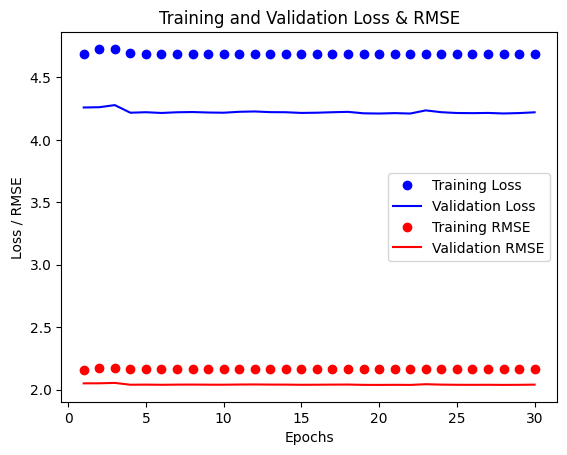

In [24]:
def plot_loss_and_rmse(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']

    epochs = range(1, len(loss) + 1)

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.plot(epochs, rmse, 'ro', label='Training RMSE')
    plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
    plt.title('Training and Validation Loss & RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('Loss / RMSE')
    plt.legend()
    plt.show()

# Assuming you have trained the model and have the 'history' object
plot_loss_and_rmse(history)

In [ ]:
predictions = lstm_model.predict(test_daily_x)
validation_results = {
    'predictions': predictions,
    'actual_values': test_daily_y
}

In [ ]:
# # Creating the LSTM Model function and my hyperparameters
# from keras.wrappers.scikit_learn import KerasRegressor # KerasRegressor used as a work around to make Keras Model compatible with scikit-learn's cv functions 

# # Different hyperparameters to tune
# num_units = [32, 64, 128] 
# dropout_rates = [0.2, 0.3, 0.4] 
# learning_rates = [0.001, 0.01, 0.1] 

# # Function to create the LSTM model
# def create_lstm_model(units, dropout_rate, learning_rate):
#     model = Sequential()
#     model.add(LSTM(units, activation='relu', input_shape=(train_daily_x_reshaped.shape[1], train_daily_x_reshaped.shape[2]), return_sequences=True))
#     model.add(Dropout(dropout_rate))
#     model.add(LSTM(units, activation='relu', return_sequences=True))
#     model.add(Dropout(dropout_rate))
#     model.add(LSTM(units, activation='relu', return_sequences=False))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(train_daily_y_reshaped.shape[1]))
    
#     optimizer = adam(learning_rate=learning_rate)
    
#     model.compile(optimizer=optimizer, loss='mse')
    
#     return model

In [ ]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

Keras version: 2.12.0
TensorFlow version: 2.12.0


In [ ]:
# mean_scores = []
# training_histories = []

# # For each combination of hyperparameter values, perform 5-Fold cross validation with respect to the time sequence
# tscv = TimeSeriesSplit(n_splits=5)

# for i, units in enumerate(num_units):
#     for dropout_rate in dropout_rates:
#         for learning_rate in learning_rates:
#             model = KerasRegressor(build_fn=create_lstm_model, units=units, dropout_rate=dropout_rate, learning_rate=learning_rate, epochs=50, batch_size=5, verbose=1)
#             cv_scores = -cross_val_score(model, train_daily_x_reshaped, train_daily_y_reshaped, cv=tscv, scoring='neg_mean_squared_error', error_score='raise')
#             mean_scores.append(np.mean(cv_scores))
#             training_histories.append(model.fit(train_daily_x_reshaped, train_daily_y_reshaped, epochs=50, batch_size=5, verbose=1))

# # scoring='neg_mean_squared_error' sets the scoring metric for evaluation. In this case, we are using the mean squared error (MSE) as the metric.
# #  The 'neg' prefix is used to indicate that the scores should be negated.
# # The negative sign before cross_val_score (-cross_val_score) is used to invert the sign of the scores.
# # By default, scikit-learn assumes that higher scores are better, but in the case of MSE, we want to minimize it.
# # So, by negating the scores, we effectively convert them to negative values, which allows us to use the maximize behavior of scikit-learn's scoring functions while actually minimizing the MSE.

# # Plot the Cross-Validation Curve against the MSE to evaluate the skill of the model
# hyperparameter_combinations = [(units, dropout_rate, learning_rate) for units in num_units for dropout_rate in dropout_rates for learning_rate in learning_rates]
# plt.plot(hyperparameter_combinations, mean_scores)
# plt.xlabel('Hyperparameter Combination')
# plt.ylabel('Mean Performance Score (MSE)')
# plt.xticks(rotation=90)
# plt.show()

# # Print the training summary for the best model
# best_model_index = np.argmax(mean_scores)
# best_model = training_histories[best_model_index].model
# best_model.summary()

<ipython-input-11-c3f0f73ebf33>:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, units=units, dropout_rate=dropout_rate, learning_rate=learning_rate, epochs=50, batch_size=5, verbose=1)


TypeError: ignored